# ECHO STATE NETWORK AND VAE BASED ONE CLASS TIME SERIES LEARNING

In [1]:
import src.dataset_generator as dg
import sys
import matplotlib.pyplot as plt
sys.path.append("/home/dcabrera/Echo_State_Networks")
sys.path.append("/home/dcabrera/Variational_Auto_Encoder")
print(sys.path)
%matplotlib inline

['', '/usr/lib64/python34.zip', '/usr/lib64/python3.4', '/usr/lib64/python3.4/plat-linux', '/usr/lib64/python3.4/lib-dynload', '/home/dcabrera/myvenv/lib64/python3.4/site-packages', '/home/dcabrera/myvenv/lib64/python3.4/site-packages/pip-1.5.6-py3.4.egg', '/home/dcabrera/myvenv/lib64/python3.4/site-packages/scikit_cuda-0.5.2-py3.4.egg', '/home/dcabrera/myvenv/lib/python3.4/site-packages', '/home/dcabrera/myvenv/lib/python3.4/site-packages/pip-1.5.6-py3.4.egg', '/home/dcabrera/myvenv/lib/python3.4/site-packages/scikit_cuda-0.5.2-py3.4.egg', '/home/dcabrera/myvenv/lib64/python3.4/site-packages/IPython/extensions', '/home/dcabrera/.ipython', '/home/dcabrera/Echo_State_Networks', '/home/dcabrera/Variational_Auto_Encoder']


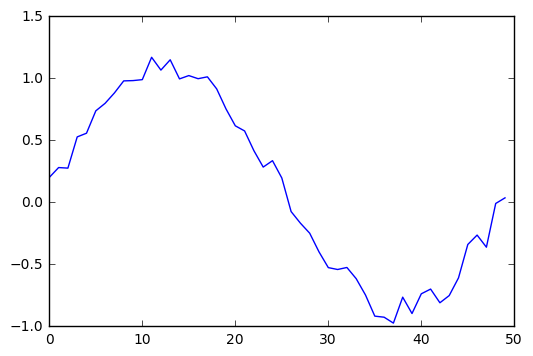

In [2]:
import src.esn_features as esn_features
import src.vae_prob as vae_prob
from VAE.vae import VaeNetwork
from ESNs.standard import EsnNetwork
import tensorflow as tf
sess = tf.InteractiveSession()

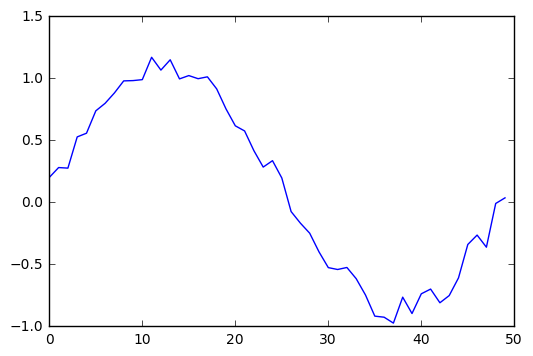

In [3]:
normal_signals = dg.sine_signals()
plt.plot(normal_signals[0,0:50])

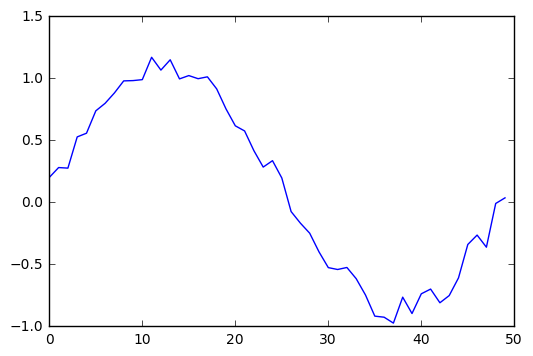

In [4]:
corrupted_signals = dg.corrupt_sine_signals()
plt.plot(corrupted_signals[0,0:50])

In [5]:
prec = tf.float64
reservoir_size = 100
data = tf.placeholder(prec, [None, 1])
target = tf.placeholder(prec, [None, 1])
esn = EsnNetwork(data, target, reservoir_size=reservoir_size, prec=prec)

In [6]:
network_architecture = dict(n_hidden_recog_1=1000,  # 1st layer encoder neurons
                            n_hidden_recog_2=1000,  # 2nd layer encoder neurons
                            n_hidden_gener_1=1000,  # 1st layer decoder neurons
                            n_hidden_gener_2=1000,  # 2nd layer decoder neurons
                            n_z=20)
features = tf.placeholder(tf.float32, [None, reservoir_size])
vae = VaeNetwork(features,network_architecture)
sess.run(tf.global_variables_initializer())

In [7]:
batches = esn_features.feature_extraction(sess=sess, esn=esn, data=data, 
                                          target=target,
                                          signals=normal_signals,
                                          size_subsignals=1000,
                                          overlapping=100,delay=1)

In [8]:
cost, vae = vae_prob.modelling_vae(sess=sess,vae=vae,data=features,batches=batches,epochs=20)

In [9]:
cost

[[(88.401093, 27.398518, 115.79961),
  (77.412186, 16.177769, 93.589951),
  (67.535217, 8.7113914, 76.246613),
  (58.523727, 4.0096073, 62.533333),
  (50.50695, 1.4614263, 51.96838),
  (43.334602, 0.54405332, 43.878654),
  (37.04882, 0.73806441, 37.786888),
  (31.564112, 1.533119, 33.097229),
  (26.691322, 2.4879248, 29.179249),
  (22.45273, 3.2837443, 25.736475)],
 [(18.60508, 3.7633371, 22.368418),
  (15.378711, 3.8573704, 19.236082),
  (12.581791, 3.6296968, 16.211487),
  (10.168636, 3.181973, 13.350609),
  (7.9675331, 2.6327319, 10.600266),
  (6.0255423, 2.0896845, 8.1152267),
  (4.3504081, 1.6275076, 5.9779158),
  (2.7515388, 1.2819303, 4.0334692),
  (1.3717375, 1.0515857, 2.4233229),
  (0.072250515, 0.90987998, 0.98213053)],
 [(-1.4876735, 0.81922954, -0.66844404),
  (-2.6912384, 0.74839103, -1.9428473),
  (-3.8591564, 0.67430341, -3.1848531),
  (-4.9685316, 0.58796942, -4.3805618),
  (-6.0854445, 0.49275652, -5.5926876),
  (-7.1398144, 0.40054923, -6.739265),
  (-8.080369, 0.325

In [10]:
corrupted_batches = esn_features.feature_extraction(sess=sess, esn=esn, data=data, 
                                          target=target,
                                          signals=corrupted_signals,
                                          size_subsignals=1000,
                                          overlapping=100,delay=1)

In [11]:
test_cost = vae_prob.test_esn_vae(sess=sess,vae=vae,data=features,
                                  batches=corrupted_batches)
test_cost

[(32.322487, 0.061185494, 32.383667),
 (34.27282, 0.059632204, 34.332451),
 (33.925392, 0.063270599, 33.988663),
 (33.500511, 0.063100919, 33.563614),
 (32.51001, 0.059396237, 32.569401),
 (31.895576, 0.059041411, 31.954618),
 (33.232834, 0.059372611, 33.292206),
 (33.151466, 0.059741698, 33.211208),
 (29.350903, 0.061309136, 29.41221),
 (29.214169, 0.058364414, 29.272533)]

In [12]:
test_cost = vae_prob.test_esn_vae(sess=sess,vae=vae,data=features,
                                  batches=batches)
test_cost

[(-28.454971, 0.00016529667, -28.454807),
 (-28.370205, 0.0001526296, -28.370052),
 (-28.273363, 0.00014079049, -28.273222),
 (-28.164629, 0.0001296699, -28.164499),
 (-28.04184, 0.00011942061, -28.041719),
 (-27.902933, 0.00010981505, -27.902824),
 (-27.747099, 0.00010181936, -27.746996),
 (-27.575241, 9.4694435e-05, -27.575148),
 (-27.39151, 8.884017e-05, -27.391422),
 (-27.193939, 8.4507461e-05, -27.193853)]